# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

## Loading the data 

In [10]:
# Imports and data loading
import torch
from torchvision import datasets, transforms
import helper
from torch import nn

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

---
Here we can see one of the images. You'll notice that they aren't very good quality but this is probably to reduce the build time of the neural network; if you had a more detailed image then you would have many more imports as our flattened image data is essentially one input per pixel of the image. 

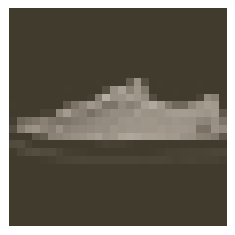

In [11]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [39]:
# Define network architecture here
# The alternative is to create a network class that we then instantiate
# What is the difference between defining a network class and using sequential? See below for a brief explanation. 
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      # Using the log softmax means that we can easily transform to probabilities later
                      # Require values for optimisation through the loss function
                      nn.LogSoftmax(dim=1))

`nn.Sequential()` is a container that builds network in the order in which they are defined. Creating a class and extending the `nn.Module` is a base class for all neural network modules. You can see the difference in the [docs](https://pytorch.org/docs/stable/nn.html). 

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [28]:
# Define the criterion 
criterion = nn.CrossEntropyLoss()

# Define the optimiser - need to import the relevant pytorch library
from torch import optim

# Note the learning rate of the network is defined here
optimiser = optim.SGD(model.parameters(), lr=0.01)

In [29]:
# Train the network 
n_epochs = 10

for e in range(n_epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten images into a 784 long vector
        # Note that this step could be altered to flatten the images in the forward loop within the class, but in this instance we didn't define the network using the base class but rather using the Sequential container
        # The first argument here keeps the batch size number the same but flattens the shape of the image i.e. 28*28=784
        images = images.view(images.shape[0], -1)
    
        # Clear the gradients, do this because gradients are accumulated
        optimiser.zero_grad()
        
        # Generate the output from the model 
        output = model.forward(images)
        
        # Calculate the loss using the criterion defined above 
        loss = criterion(output, labels)
        
        # Make sure that we actually update the gradients 
        # Calculate the gradients for the backwards step
        loss.backward()
        
        # Optimiser step to change the gradients
        optimiser.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.0020490250607799
Training loss: 0.5536501304681367
Training loss: 0.4884226790496281
Training loss: 0.4547341766038429
Training loss: 0.43259850161861
Training loss: 0.41525814180244514
Training loss: 0.40161832564992944
Training loss: 0.3894739959285712
Training loss: 0.378435919438598
Training loss: 0.3687503171056064


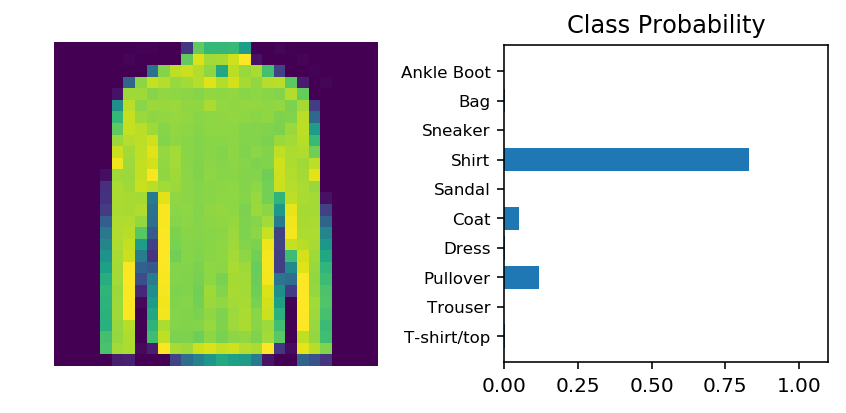

In [38]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
output = model(img)
ps = torch.exp(output)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')